In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib.util
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
    
from data_handle.data_load import ForexDataLoad
from data_handle.quick_look import ForexQuickLook
from data_handle.data_clean import ForexDataClean

from features.indicators import ForexMomentumIndicators, ForexTrendIndicators, ForexVolumeIndicators, ForexVolatilityIndicators

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = ForexDataLoad(file_path = '../data/xauaud.csv').data

FOREX DATA LOADER
 Available Fuctions 
1 load_csv 
2 load_dataframe 
3 load_from_database
Data loaded successfully!
Shape: (38217, 5)



FOREX QUICK LOOK
 Available Fuctions 
1 display_info 
2 check_missing_values_and_duplicates 
3 plot_candlestick 
4 plot_time_series 
5 get_summary
DATASET INFORMATION

1. BASIC INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38217 entries, 2017-04-24 01:00:00 to 2025-09-05 20:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    38217 non-null  float64
 1   high    38217 non-null  float64
 2   low     38216 non-null  float64
 3   close   38217 non-null  float64
 4   volume  38217 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.7 MB
None

2. FIRST 3 ROWS:
                        open     high     low    close  volume
datetime                                                      
2017-04-24 01:00:00  1678.43  1687.45     NaN  1685.98    3410
2017-04-24 02:00:00  1686.03  1686.15  1681.3  1682.15    4146
2017-04-24 03:00:00  1682.11  1691.44  1681.9  1689.13    4329

3. LAST 3 ROWS:
          

<Figure size 1500x600 with 0 Axes>

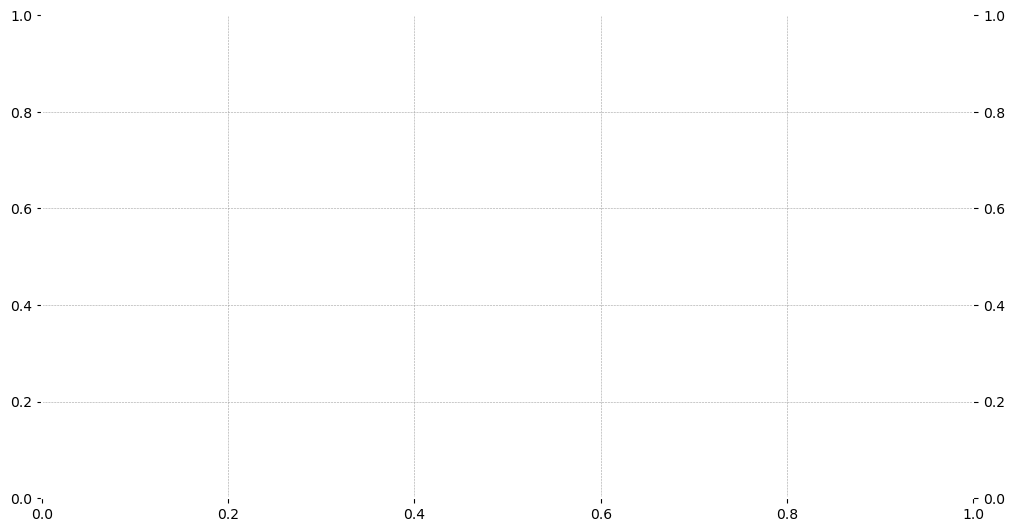

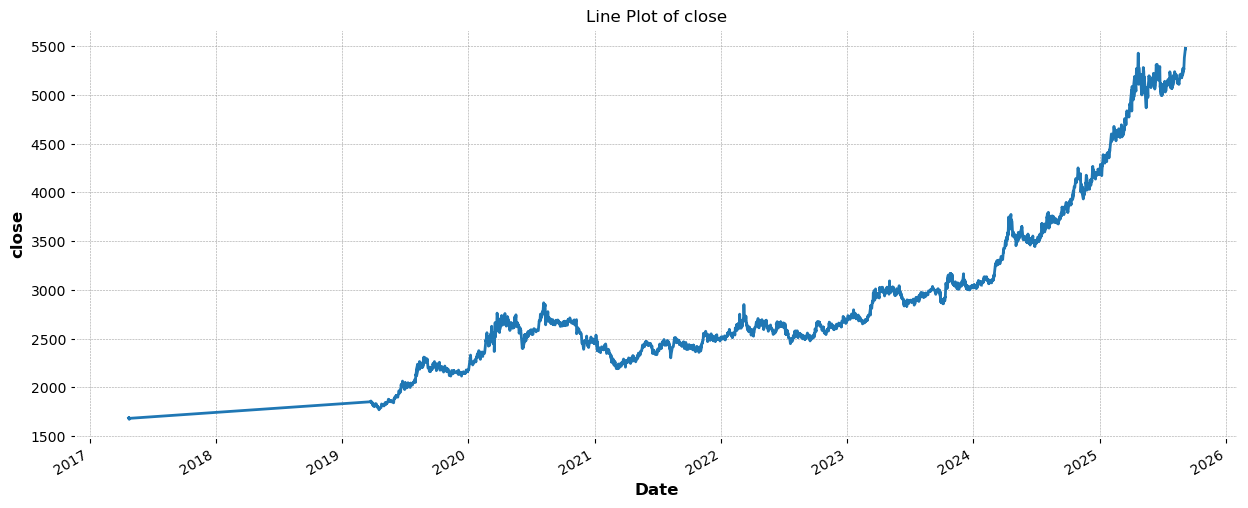

DATASET SUMMARY
Total Rows: 38217
Total Columns: 5
Date Range: 2017-04-24 01:00:00 to 2025-09-05 20:00:00
Numeric Columns: ['open', 'high', 'low', 'close', 'volume']
Non Numeric Columns: []
Missing Values: 1
Duplicates: 0
Columns: Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')
Index Column: datetime


In [4]:
quick_look = ForexQuickLook( data = df, full_look = True)